# Kaggle Data Science test "House pricing"

## Content

- [Loading the data and all the libraries.](#ch1)
- [Data exploration](#ch2)
 - [SalePrice variable.](#ch3)
 - [Explanatory variables.](#ch4)
   - [Numeric variables.](#ch5)
   - [Catagorical data](#ch6)
 - [Missing observations](#ch7)
 - [Deleting features with strong correlation](#ch8)
 - [Removing outliers](#ch9)
 - [Filling in the numeric data](#ch10)
 - [Filling in the categorical data](#ch11)
 - [Normalizing the data](#ch12)
 - [One-hot encoding](#ch13)
- [Making predictions](#ch14)
  - [Splitting the dataset into train and test sets](#ch15)
  - [XGboost](#ch17)
  - [Creating the decision tree](#ch18)
  - [Visualizing the tree](#ch19)
  - [Random forest](#ch20)
  - [Gradient boosting](#ch21)
  - [SVC](#ch22)
- [Conclusion](#ch24)
 

## Loading the data and the libraries <a class="anchor" id="ch1"></a>

In [244]:
#loading libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.special import erfc
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from os import system 
# output display options
pd.set_option('display.max_columns', 1000)
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [245]:
#load the dataset
df = pd.read_csv("train.csv")

## Data exploration <a class="anchor" id="ch2"></a>

In [246]:
#defining the size of our table
print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))
print("\nThe first 2 rows of the dataset")
df.head(2)

The dataset has 1460 rows and 81 columns.

The first 2 rows of the dataset


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [247]:
#discovering the type of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### SalePrice variable <a class="anchor" id="ch3"></a>

In [248]:
#discovering the range of our SalePrice variable
maxx = max(df['SalePrice'])
minn = min(df['SalePrice'])
print('The SalePrice variable takes the values from {} to {}.'.format(minn, maxx))

The SalePrice variable takes the values from 34900 to 755000.


Text(0.5, 1.0, 'Density')

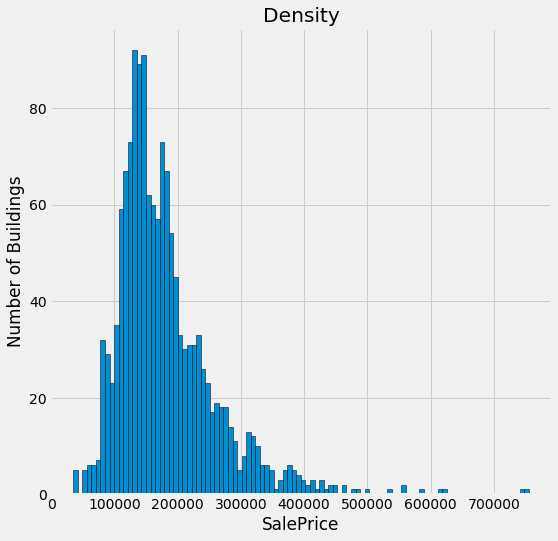

In [249]:
figsize(8, 8)
# Histogram of the density
plt.style.use('fivethirtyeight')
plt.hist(df['SalePrice'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('SalePrice')
plt.ylabel('Number of Buildings')
plt.title('Density')

### Explanatory variables <a class="anchor" id="ch4"></a>

####           Numeric variables <a class="anchor" id="ch5"></a>

In [250]:
df.drop(['Id'], axis = 1).describe().round(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


One can notice the variables have very different magnitudes. Therefore, the variables would need to be normalized.

####           Categorical variables <a class="anchor" id="ch6"></a>

In [251]:
df.describe(include = ['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


### Missing observations <a class="anchor" id="ch7"></a>

In [252]:
print("\nThe number of missing records for each of the variables:")
df.isna().sum().to_frame().sort_values(0, ascending = False).T


The number of missing records for each of the variables:


,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,MasVnrArea,MasVnrType,Electrical,Id,Functional,Fireplaces,KitchenQual,KitchenAbvGr,BedroomAbvGr,HalfBath,FullBath,BsmtHalfBath,TotRmsAbvGrd,GarageCars,GrLivArea,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BsmtFullBath,HeatingQC,LowQualFinSF,LandSlope,OverallQual,HouseStyle,BldgType,Condition2,Condition1,Neighborhood,LotConfig,YearBuilt,Utilities,LandContour,LotShape,Street,LotArea,MSZoning,OverallCond,YearRemodAdd,2ndFlrSF,BsmtFinSF2,1stFlrSF,CentralAir,MSSubClass,Heating,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
0,1453,1406,1369,1179,690,259,81,81,81,81,81,38,38,37,37,37,8,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We have sorted the number of missing observations for each column. We have noticed that the first four columns (PoolQC, MiscFeature, Alley, Fence) have more than 50% of missing values. But in order to look at it all in the detail let's look at the table that has the percentage of missing values.

In [253]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [254]:
missing_values_table(df)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [255]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

# Drop the columns
df = df.drop(columns = list(missing_columns))

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.
We will remove 4 columns.


### Deleting features with strong correlation <a class="anchor" id="ch8"></a>

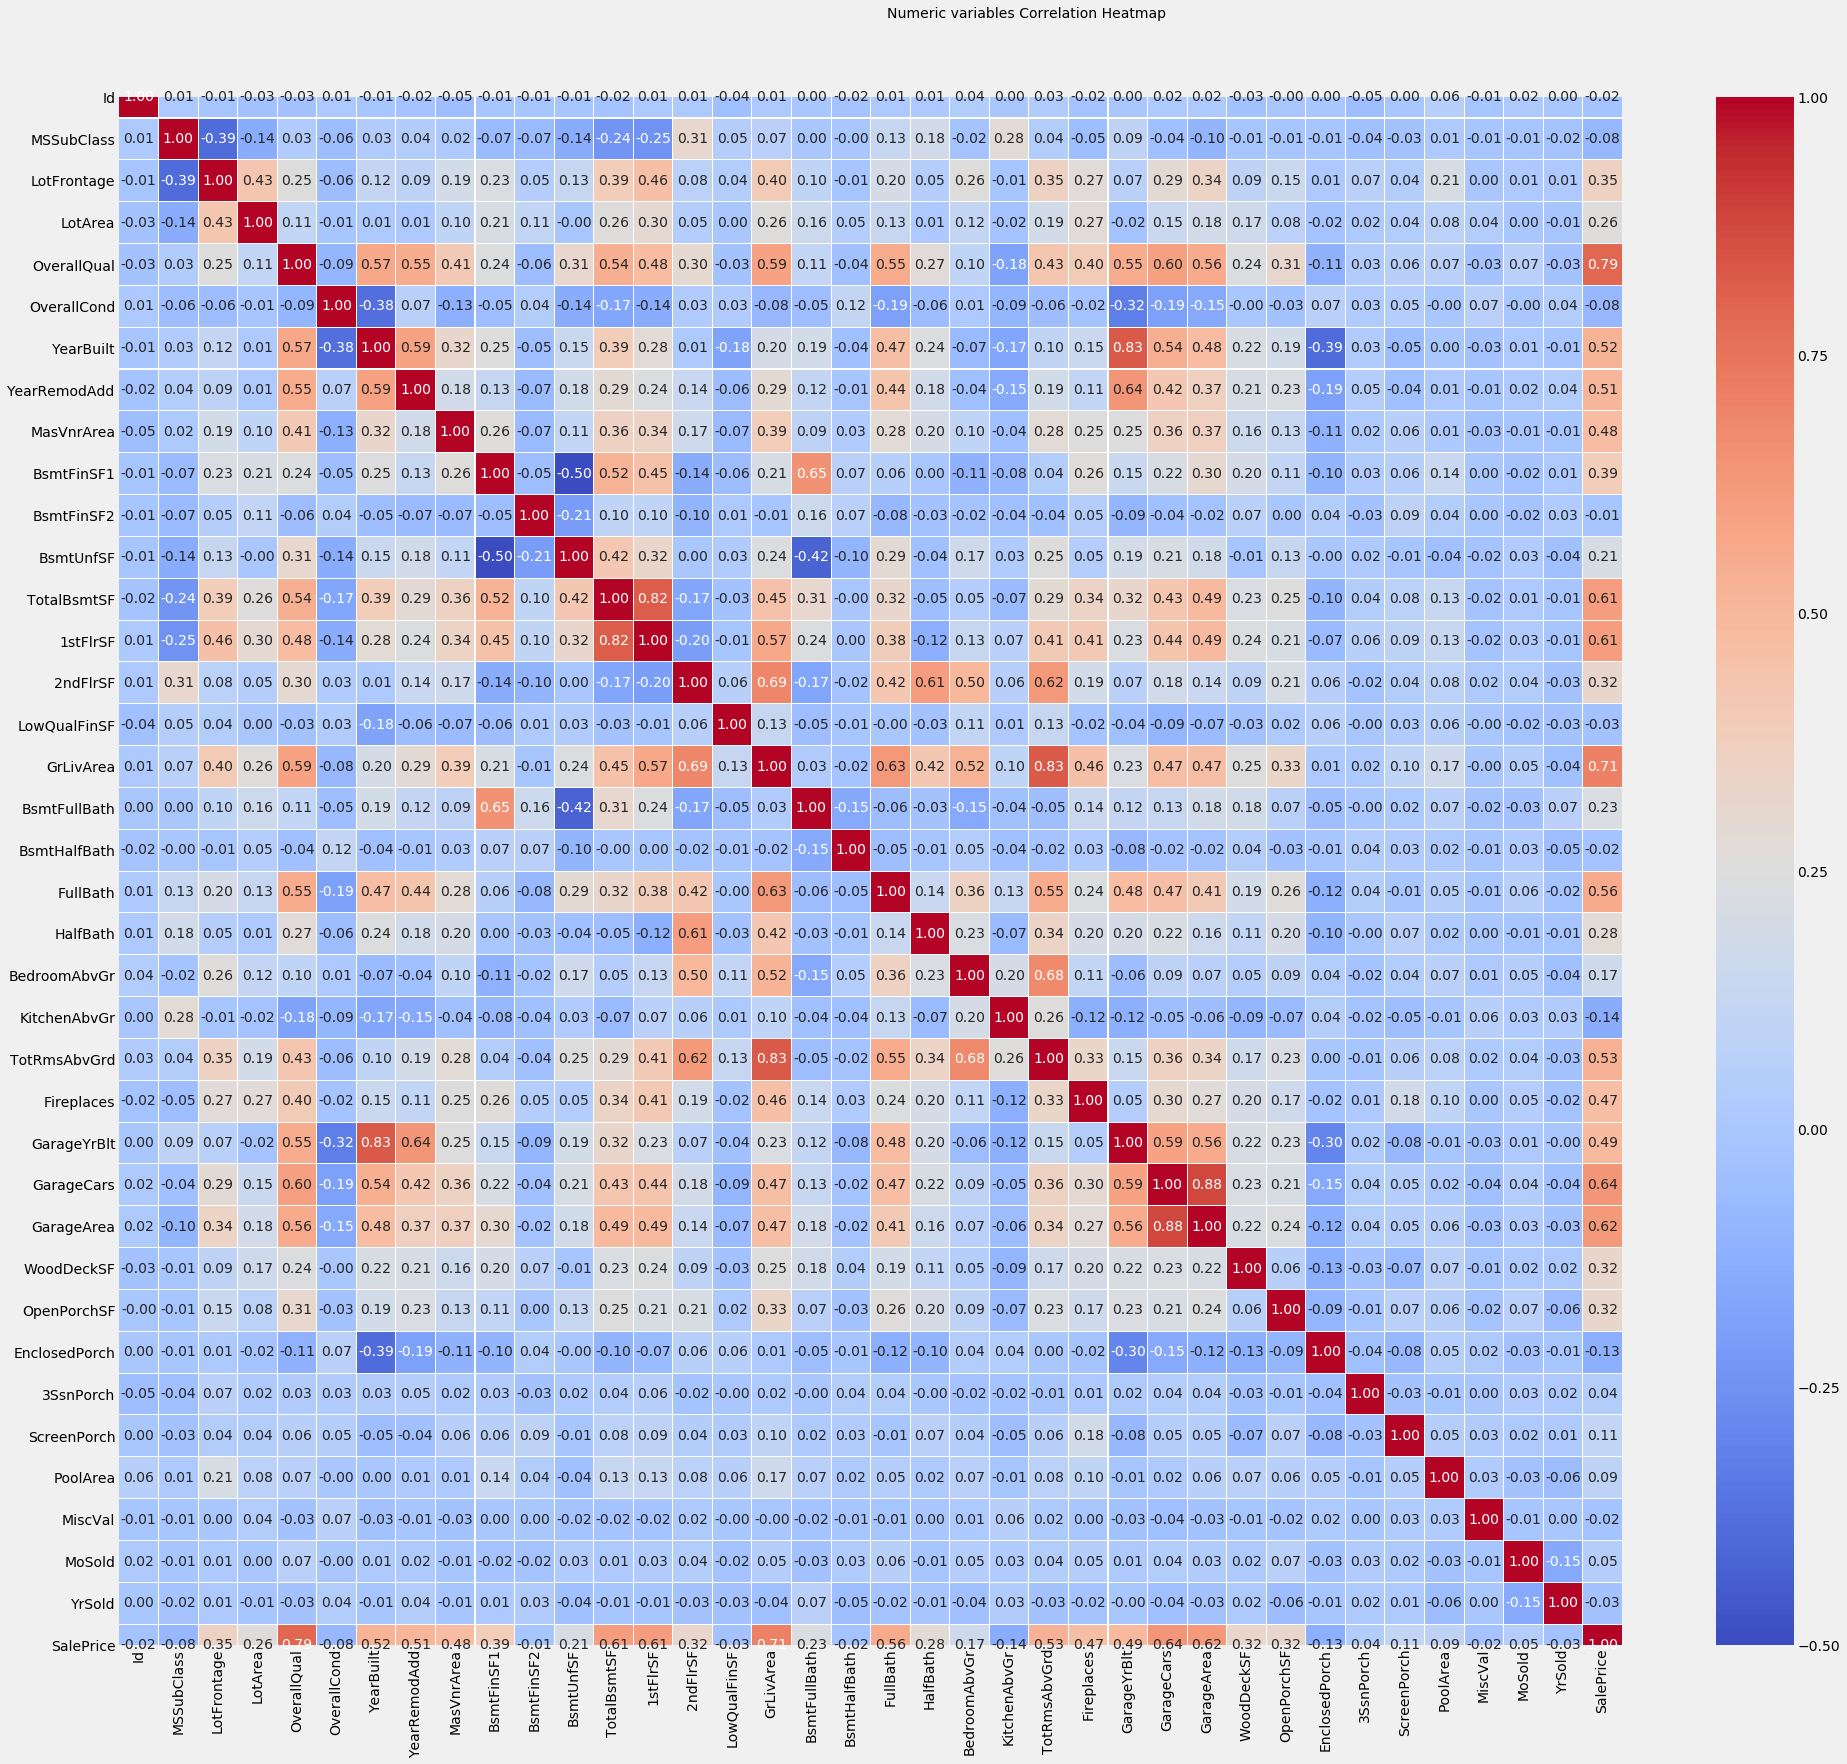

In [256]:
f, ax = plt.subplots(figsize=(30, 25))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Numeric variables Correlation Heatmap', fontsize=14)

In [257]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        df = x.drop(col, axis=1)

    return df


In [258]:
corr_df(df, 0.6)

GrLivArea | 2ndFlrSF | 0.69
BsmtFullBath | BsmtFinSF1 | 0.65
FullBath | GrLivArea | 0.63
HalfBath | 2ndFlrSF | 0.61
TotRmsAbvGrd | 2ndFlrSF | 0.62
TotRmsAbvGrd | GrLivArea | 0.83
TotRmsAbvGrd | BedroomAbvGr | 0.68
GarageYrBlt | YearBuilt | 0.83
GarageYrBlt | YearRemodAdd | 0.64
GarageCars | OverallQual | 0.6
SalePrice | OverallQual | 0.79
SalePrice | TotalBsmtSF | 0.61
SalePrice | 1stFlrSF | 0.61
SalePrice | GrLivArea | 0.71
SalePrice | GarageCars | 0.64
SalePrice | GarageArea | 0.62


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [260]:
class fillna_knn(object):
    def __init__(self, dataframe, flag):
        self.inplace = flag
        if self.inplace:
            self.dataset = dataframe.copy()
        else:
            self.dataset = dataframe
        self.unique_cat = []
        self.encoder = LabelEncoder()

    def fill(self):
        self.__encoding()  # При создании объекта кодируем датафрейм
        self.count_nan = sum(self.dataset.isnull().sum())
        print(self.count_nan)
        while self.count_nan > 0:
            for column in self.dataset.columns.values:
                for row in range(len(self.dataset)):
                    if pd.isnull(self.dataset[column][row]):
                        df = self.__new_dataset(column)
                        total, target = self.__preparing_data(df, row, column)
                        self.dataset[column][row] = self.__nearest_neighbor(total, target)
                        self.count_nan = sum(self.dataset.isnull().sum())
                        #print(self.count_nan)
        self.dataset[self.object_col] = self.dataset[self.object_col].astype('int')
        self.__decoding()
        return self.dataset

    def __dist(self, first_vector, second_vector):
        first_vector = np.array(first_vector)
        distance = (sum((first_vector - second_vector) ** 2)) ** 0.5
        return distance

    def __without_nan(self, column_val):  # пропуск NaN при кодировании
        final_column_val = [0] * len(column_val)
        for index, element in enumerate(column_val):
            if element is not np.nan:
                final_column_val[index] = self.encoder.transform([column_val[index]])[0]
            else:
                final_column_val[index] = element
        return final_column_val

    def __encoding(self):
        # сбор категориальных признаков
        self.object_col = self.dataset.describe(include=['O']).columns.values
        for col in self.object_col:
            self.unique_cat += list(self.dataset[col].unique())
        self.unique_cat = list(set(self.unique_cat))
        index_del_nan = self.unique_cat.index(np.nan)
        self.unique_cat.pop(index_del_nan)
        # кодирование полученных признаков
        self.encoder.fit(self.unique_cat)
        self.dataset[self.object_col] = self.dataset[self.object_col].apply(lambda col: self.__without_nan(col))

    def __new_dataset(self, column):
        dataframe = self.dataset.copy()
        for index, val in enumerate(dataframe[column]):
            if pd.isnull(val):
                dataframe.drop([index], axis=0, inplace=True)
        dataframe.dropna(inplace=True)
        return dataframe

    def __preparing_data(self, data, row, column):
        # выделяем целевую строчку
        target_row = self.dataset.iloc[row].drop([column], inplace=False)
        # выделяем целевой столбец
        target_column = data[column].copy()
        # удаляем целевой столбец из датасета
        data = data.drop([column], axis=1)
        # объединяем строку  и класс(значение целевого столбца) соответсвующий ей
        total = []
        if len(target_column) == len(data):
            for i in range(len(data)):
                total.append([data.iloc[i], target_column.iloc[i]])
        else:
            raise SystemExit('Целевая колонка не равна по длине основный данным')
        return total, target_row

    def __nearest_neighbor(self, total, test_point):
        test_dist = [[self.__dist(test_point, data[0]), data[1]] for data in total]
        return sorted(test_dist)[0:1][0][1]

    def __decoding(self):
        self.dataset[self.object_col] = self.dataset[self.object_col].apply(
            lambda col: self.encoder.inverse_transform(col))

In [261]:
print(sum(df.isnull().sum()),'number of nan')
fill_cat=fillna_knn(df,1)
total_dataframe=fill_cat.fill()

1558 number of nan
1558


C:\Users\Anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


##### Filling in the numeric data <a class="anchor" id="ch10"></a>

In [232]:
df_numeric = df.select_dtypes(exclude = ["O"])
cols_df_numeric = list(df_numeric)
df_numeric_n_of_NA = df_numeric.isna().sum().to_frame().rename(columns = {0:"n_NA"})
numeric_cols_with_NA = list(df_numeric_n_of_NA[df_numeric_n_of_NA.n_NA > 0].T.columns)
print("\nThe numerical variables with NA's are: {}.".format(numeric_cols_with_NA))
df_no_NA = df.copy()
df_no_NA[numeric_cols_with_NA] = df_no_NA[numeric_cols_with_NA].fillna(df_no_NA[numeric_cols_with_NA].median())


The numerical variables with NA's are: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'].


### Removing outliers <a class="anchor" id="ch9"></a>

<h3>The first variant(Критерий Шовене)</h3>

In [233]:
def standard_deviation_and_mean(series):
    mean=pd.Series(series).mean()
    sig=0
    for  element in series:
        sig+=(element-mean)**2
    deviation=((1/(len(series)-1))*sig)**0.5
    return deviation, mean

Now we should remove outliers without updating the medium and deviation.

In [234]:
def cheking_and_del_lite(global_series):
    series=pd.Series(global_series)
    deviation,mean=standard_deviation_and_mean(series)
    mass_index=[]
    count=1
    while count!=0:
        count=0
        for index,element in enumerate(series):
            if erfc((abs(element-mean))/deviation)>=(1/(2*len(series))):
                mass_index.append(index)
                series=series.drop(index)
                count+=1

        series=pd.Series(series.tolist())
    return[i for  i in range(len(global_series)) if i not in mass_index] #return index to delete

<p>Массив с именнами столбцов, которые, по моему мнению, имеет смысл чистить от выбросов</p>

In [235]:
mass=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces','GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','SalePrice']
    


In [196]:
for i in mass:
    mass_to_del=[]
    index_del=cheking_and_del_lite(df_no_NA[i].tolist())
    for i in index_del:
        if i not in mass_to_del:
            mass_to_del.append(i)
df_no_NA.drop(mass_to_del,axis=0,inplace=True)

In [200]:
'number of NaNs '+str(sum(df_no_NA.isnull().sum()))

'number of NaNs 1209'

<h3>Вариант 2(поиск по квартилям)</h3>

In [236]:
q25=np.array(df_no_NA[mass].describe(percentiles=[.25,.75]).loc['25%'])
q75=np.array(df_no_NA[mass].describe(percentiles=[.25,.75]).loc['75%'])
first_part=q25-1.5*(q75-q25)
second_part=q75+1.5*(q75-q25)
index_del=[]
final_del=[]
for index,value in enumerate(mass):
    for index_val,val in enumerate(df_no_NA[value]):
        if val<first_part[index] or val>second_part[index]:
            index_del.append(index_val)
index_del=set(index_del)
print('Количество строк, выбранных для удаления: ',len(index_del))
df_no_NA.drop(index_del,axis=0,inplace=True)

Количество строк, выбранных для удаления:  828


### Filling in the categorical data <a class="anchor" id="ch11"></a>

In [237]:
# find the names of the object (categorical) columns that have missing values
df_object = df.select_dtypes(include = ["O"])

df_object_n_of_NA = df_object.isna().sum().to_frame().rename(columns = {0:"n_NA"})
categorical_cols_with_NA = list(df_object_n_of_NA[df_object_n_of_NA.n_NA > 0].T.columns)
print("\nThe categorical variables with NA's are: {}.".format(categorical_cols_with_NA))

df_no_NA[categorical_cols_with_NA] = df_no_NA[categorical_cols_with_NA].fillna(
    df_no_NA[categorical_cols_with_NA].mode().iloc[0])


The categorical variables with NA's are: ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'].


In [238]:
'number of NaNs: '+str(sum(df_no_NA.isnull().sum()))

'number of NaNs: 0'

### Normalazing the data <a class="anchor" id="ch12"></a>

In [239]:
print("\nFor each numeric column the maximum and minimum values are:")
round(df_no_NA.select_dtypes(exclude = ["O"]). drop(['Id'], axis = 1)).agg(["min", "max"])



For each numeric column the maximum and minimum values are:


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
min,20,32.0,1974,1,1,1885,1950,0.0,0,0,0,264,438,0,0,438,0,0,0,0,1,1,3,0,1914.0,0,0,0,0,0,0,0,0,0,1,2006,35311
max,190,107.0,17600,10,9,2009,2010,410.0,1619,0,1670,2000,2117,1349,0,2727,2,0,3,1,4,1,10,2,2010.0,3,928,402,170,0,0,0,0,15500,12,2010,339750


In [240]:
sale_price=df_no_NA['SalePrice']
df_no_NA.drop(['Id','SalePrice'],axis=1,inplace=True)
cols_df_numeric.pop(cols_df_numeric.index('Id'))
cols_df_numeric.pop(cols_df_numeric.index('SalePrice'))


'SalePrice'

In [241]:
# initialize the scaler
scaler = MinMaxScaler()

In [242]:
# scaling the numeric variables
df_no_NA[cols_df_numeric] = scaler.fit_transform(df_no_NA[cols_df_numeric])

In [243]:
print("\nThe first 2 rows of the normalized data:")
df_no_NA[cols_df_numeric].head(2)


The first 2 rows of the normalized data:


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.44,0.414437,0.666667,0.5,0.951613,0.883333,0.478049,0.436072,0.0,0.08982,0.341014,0.248958,0.633062,0.0,0.555701,0.5,0.0,0.666667,1.0,0.666667,0.0,0.714286,0.0,0.927083,0.666667,0.590517,0.0,0.358824,0.0,0.0,0.0,0.0,0.0,0.090909,0.5
2,0.235294,0.48,0.593626,0.666667,0.5,0.935484,0.866667,0.395122,0.300185,0.0,0.25988,0.377880,0.287076,0.641957,0.0,0.588903,0.5,0.0,0.666667,1.0,0.666667,0.0,0.428571,0.5,0.906250,0.666667,0.655172,0.0,0.247059,0.0,0.0,0.0,0.0,0.0,0.727273,0.5


### One hot encoding <a class="anchor" id="ch13"></a>

In [210]:
print("\nLet us take a look at the first row of the full dataset:")
df.head(1)


Let us take a look at the first row of the full dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500


Notice that some of the features are categorical (RoofStyle, Exterior1st, RoofMatl among others). Machine learning algorithms that will further applied expect numerical inputs. Therefore, the categorical variables encoded as strings should be re-coded into numerical values. This can be done via one-hot encoding which creates a dummy for each category of the variable.

In [211]:
df_no_NA.select_dtypes(include = ["O"])
print("\nThe number of columns before (one-hot) encoding of the categorical variables: {}.".format(df.shape[1]))
df_final = pd.get_dummies(df_no_NA)
print("\nThe number of columns after (one-hot) encoding of the categorical variables: {}.".format(df_final.shape[1]))


The number of columns before (one-hot) encoding of the categorical variables: 77.

The number of columns after (one-hot) encoding of the categorical variables: 275.


In [212]:
df_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,

## Making predictions <a class="anchor" id="ch14"></a>

### Splitting the dataset into the train and test sets  <a class="anchor" id="ch15"></a>

In [216]:
train, test, trA, teA = train_test_split(df_final, sale_price, test_size=0.33, random_state=42)

### XGboost  <a class="anchor" id="ch17"></a>

In [157]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3,subsample=0.5, learning_rate = 0.05,
                max_depth = 10, alpha = 10, n_estimators = 1000,booster="dart",random_state=42)

In [158]:
xg_reg.fit(train,trA)



C:\Users\Anton\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=1)

In [159]:
preds = xg_reg.predict(test)

In [160]:
errorsXG = abs(preds - teA)
print('Mean Absolute Error:', round(np.mean(errorsXG), 2), 'degrees.')

Mean Absolute Error: 13415.08 degrees.


In [161]:
mapeXG = 100 * (errorsXG / teA)
accuracyXG = 100 - np.mean(mapeXG)
print('Accuracy:', round(accuracyXG, 2), '%.')

Accuracy: 91.29 %.


In [162]:
np.sqrt(mean_squared_log_error(teA, preds))

0.12590040355469348

### Creating the decision tree <a class="anchor" id="ch18"></a>

In [163]:
regTree=DecisionTreeRegressor(max_depth=5,max_features='auto')
regTree.fit(train,trA)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [164]:
pred=regTree.predict(test)


In [165]:
errors = abs(pred - teA)
print('средняя(модульная) ошибка по тестовой выборке:', round(np.mean(errors), 2))

средняя(модульная) ошибка по тестовой выборке: 21886.24


In [166]:
mape = 100 * (errors / teA)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 85.75 %.


### Vizualizing the tree  <a class="anchor" id="ch19"></a>

In [71]:
labels=test.columns.tolist()
tree.export_graphviz(regTree, out_file="tree_with_prep.dot",feature_names=labels)

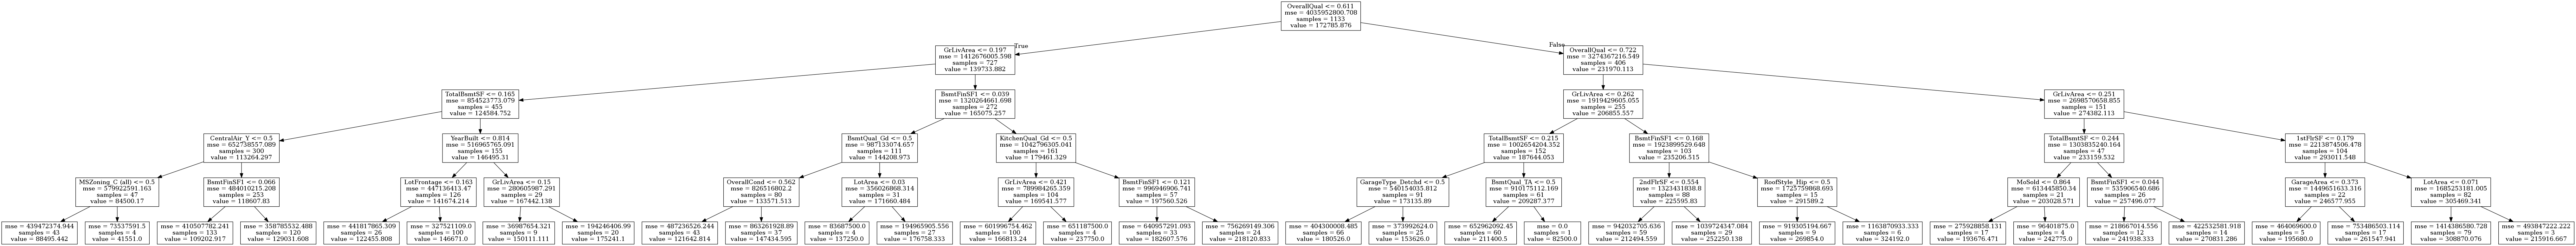


### Random forest  <a class="anchor" id="ch20"></a>

In [167]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train, trA)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [168]:
predictions = rf.predict(test)

In [169]:
errorsRF = abs(predictions - teA)
print('Mean Absolute Error:', round(np.mean(errorsRF), 2), 'degrees.')

Mean Absolute Error: 15462.87 degrees.


In [170]:
mapeRF = 100 * (errorsRF / teA)
accuracyRF = 100 - np.mean(mapeRF)
print('Accuracy:', round(accuracyRF, 2), '%.')

Accuracy: 89.92 %.


### Gradient boostong  <a class="anchor" id="ch21"></a>

In [76]:
loss = ['ls', 'lad', 'huber']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8]
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]

In [77]:
hyperparameter_grid = {'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features}

In [78]:
model = GradientBoostingRegressor(random_state = 42)

In [79]:
random_cv = RandomizedSearchCV(estimator=model,
    param_distributions=hyperparameter_grid,
    cv=4, n_iter=25, 
    scoring = 'neg_mean_squared_log_error',
    n_jobs = -1, verbose = 1, 
    return_train_score = True,
    random_state=42)

In [80]:
random_cv.fit(train, trA)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.6min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [81]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [171]:
gb2=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
gb2.fit(train,trA)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [172]:
predictionGB2=gb2.predict(test)
errorsGB2 = abs(predictionGB2 - teA)
print('MAPE:', round(np.mean(errorsGB2), 2))
mapeGB2 = 100 * (errorsGB2 / teA)
accuracyGB2 = 100 - np.mean(mapeGB2)
print('Accuracy:', round(accuracyGB2, 2), '%.')


MAPE: 13906.02
Accuracy: 91.0 %.


In [84]:
np.sqrt(mean_squared_log_error(teA, predictionGB2))

0.12713812694826065

### SVC  <a class="anchor" id="ch22"></a>

In [173]:
svc = SVC(kernel='rbf',C=1.0,gamma=0.1)
svc.fit(train, trA)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [174]:
predictionSVC=svc.predict(test)

In [175]:
errorsSVC = abs(predictionSVC - teA)
print('MAPE:', round(np.mean(errorsSVC), 2))
mapeSVC = 100 * (errorsSVC / teA)
accuracySVC = 100 - np.mean(mapeSVC)
print('Accuracy:', round(accuracySVC, 2), '%.')

MAPE: 41417.59
Accuracy: 75.58 %.


In [92]:
np.sqrt(mean_squared_log_error(teA, predictionSVC))

0.33352631035743474

## Concluding remarks  <a class="anchor" id="ch24"></a>

* 
* 
* 
* 